In [1]:
import os
import csv
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from utils import savefig

plt.rcParams['font.size'] = 16

count accuracy of each hyperparam setting

In [2]:
for j, seqlen in enumerate([4,8,12,16]):
    exp_dir = Path("./experiments/RL/Noise/NBack0/figures/ValueMemoryGRU".format(seqlen))
    for noise in ["0", "02", "04", "06", "08", "1"]:
        exp_name = "setup_seq{}_noise{}".format(seqlen, noise)
        accuracy = 0.0
        forward_asymmetry = 0.0
        temporal_factor = 0.0
        cnt = 0
        for i in range(20):
            if not os.path.exists(exp_dir / exp_name / str(i) / "contiguity_effect.csv"):
                continue
            with open(exp_dir / exp_name / str(i) / "contiguity_effect.csv") as f:
                reader = csv.reader(f)
                for row in reader:
                    if float(row[0]) >= 0.5:
                        cnt += 1
                        accuracy += float(row[0])
                        forward_asymmetry += float(row[1])
                        temporal_factor += float(row[2])
        if cnt == 0:
            cnt = 1
        print(exp_name, cnt, np.round(accuracy / cnt, 4), np.round(forward_asymmetry / cnt, 4), np.round(temporal_factor / cnt, 4))
    print()
    print("#########################")


setup_seq4_noise0 20 0.9909 0.5872 0.4032
setup_seq4_noise02 20 0.9908 0.5573 0.4173
setup_seq4_noise04 20 0.9665 0.8097 0.4434
setup_seq4_noise06 20 0.9559 0.941 0.4767
setup_seq4_noise08 20 0.8844 0.9876 0.4961
setup_seq4_noise1 20 0.8245 0.9833 0.4966

#########################
setup_seq8_noise0 20 0.9894 0.1456 0.6478
setup_seq8_noise02 20 0.9858 0.1415 0.6499
setup_seq8_noise04 20 0.9882 0.1448 0.6503
setup_seq8_noise06 20 0.9722 0.377 0.5114
setup_seq8_noise08 20 0.9786 0.6355 0.469
setup_seq8_noise1 20 0.991 0.9906 0.7376

#########################
setup_seq12_noise0 20 0.9804 0.1576 0.7314
setup_seq12_noise02 20 0.9825 0.139 0.7464
setup_seq12_noise04 20 0.9821 0.1341 0.7484
setup_seq12_noise06 20 0.9308 0.3109 0.6107
setup_seq12_noise08 20 0.9313 0.4947 0.4075
setup_seq12_noise1 20 0.9385 0.5226 0.4135

#########################
setup_seq16_noise0 20 0.9585 0.2138 0.744
setup_seq16_noise02 19 0.9552 0.2066 0.7483
setup_seq16_noise04 20 0.9329 0.2496 0.706
setup_seq16_noise06 1

plot performance, FA, TF, proportion of index encoding of different seqlen and noise

In [2]:
def plot_bar(data, std, title, save_path):
    plt.figure(figsize=(6, 4), dpi=180)

    x = np.arange(0, 1.2, 0.2)
    plt.bar(x, data, yerr=std, width=0.1)
    plt.xticks(x, ["0", "0.2", "0.4", "0.6", "0.8", "1"])

    plt.xlabel("Noise proportion")
    plt.ylabel(title)

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()

    savefig(save_path, title)

def plot_matrix(data, title, save_path, xticks=["0", "0.2", "0.4", "0.6", "0.8", "1"], yticks=["0", "0.3", "0.6", "0.9"],
                xlabel="Noise proportion", ylabel="Gamma", minv=None, maxv=None):
    assert len(xticks) == data.shape[1]
    assert len(yticks) == data.shape[0]

    plt.figure(figsize=(6, 4), dpi=180)

    plt.imshow(data, cmap='viridis', aspect='auto', norm=Normalize(vmin=minv, vmax=maxv))
    plt.colorbar()
    # cb.set_clim(minv, maxv)
    plt.xticks(np.arange(len(xticks)), xticks)
    plt.yticks(np.arange(len(yticks)), yticks)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.tight_layout()

    savefig(save_path, title)

def plot_multiline(data, title, save_path, xticks=["0", "0.2", "0.4", "0.6", "0.8", "1"], xlabel="noise proportion",
                   legend=["8", "12", "16"]):
    assert len(xticks) == data.shape[1]

    plt.figure(figsize=(4, 3.3), dpi=180)

    for i in range(data.shape[0]):
        plt.plot(np.arange(len(xticks)), data[i], label='seqlen=' + legend[i])

    plt.xticks(np.arange(len(xticks)), xticks)
    plt.xlabel(xlabel)

    plt.ylabel(title)

    plt.legend(fontsize=11)
    plt.tight_layout

    plt.show()

    savefig(save_path, title, format="svg")

In [3]:
seqlen = [8, 12, 16]
noise = [0, 0.2, 0.4, 0.6, 0.8, 1]

plot matrix of performance, forward asymmetry, temporal factor, index coding proportion for models with gamma=0.9, filter models with lower performance than 70%

[[50. 50. 50. 50. 50. 50.]
 [50. 50. 50. 50. 50. 50.]
 [50. 49. 50. 49. 50. 49.]]
[[0.691285   0.6749625  0.62999    0.616365   0.1869125  0.8056025 ]
 [0.46701333 0.454745   0.43849    0.35902667 0.13193333 0.15851   ]
 [0.33499    0.31864031 0.286205   0.23784184 0.1046825  0.11199617]]


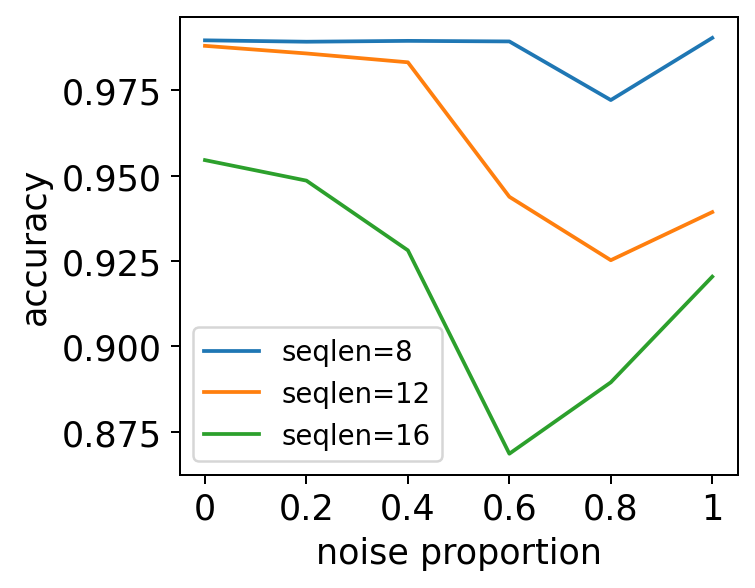

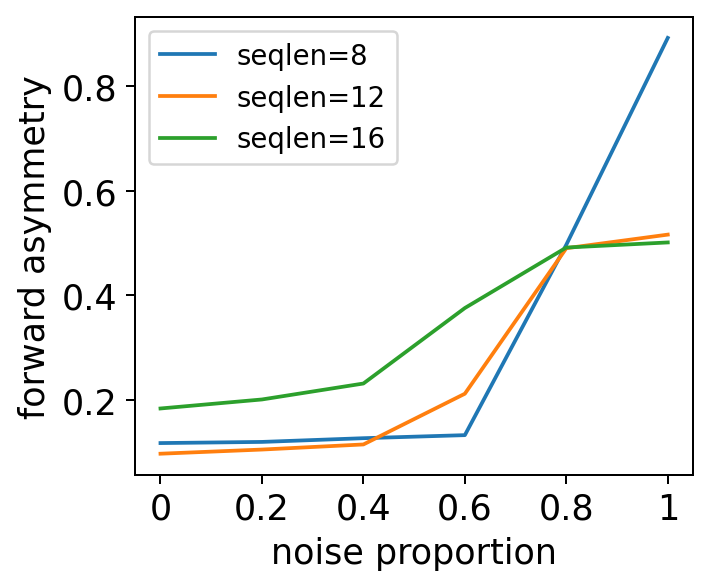

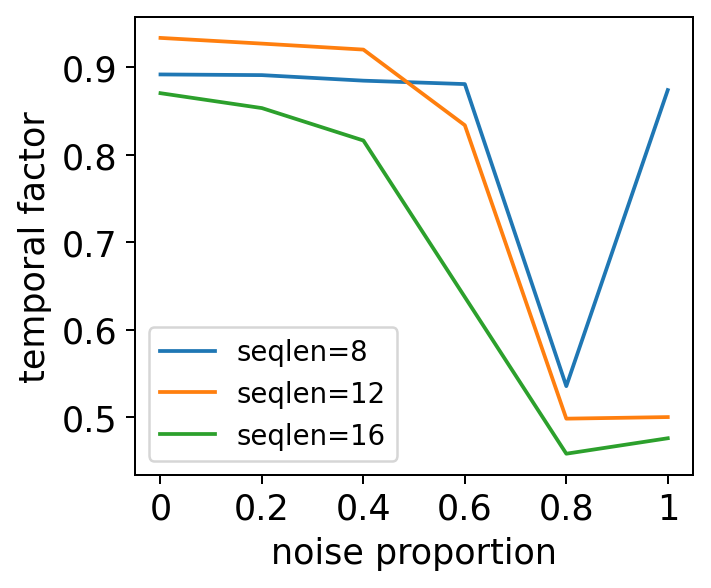

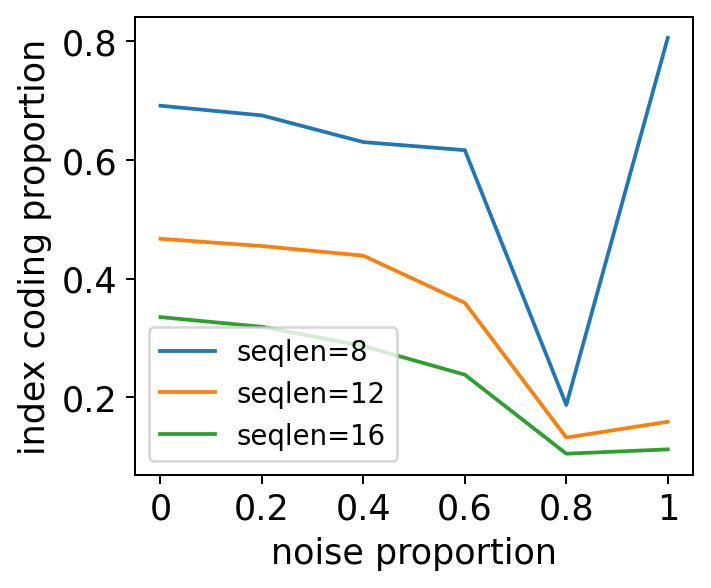

In [16]:
threshold = [0.8, 0.7, 0.6]
tf_high = np.array([0.75, 0.8333, 0.875]).reshape(-1, 1)
# tf_low = np.array([0.37, 0.41, 0.43]).reshape(-1, 1)
tf_low = np.zeros(3).reshape(-1, 1)

# all models with performance > 70

accuracy = np.zeros((3, 6))
forward_asymmetry = np.zeros((3, 6))
temporal_factor = np.zeros((3, 6))
index_coding_prop = np.zeros((3, 6))
cnt = np.zeros((3, 6))


for i, s in enumerate(seqlen):
    for j, n in enumerate(noise):
        exp_path = Path("./experiments/RL/Noise/Gamma09/figures/ValueMemoryGRU/setup_seq{}_noise{}".format(s, str(n).replace(".", "")))
        for k in range(100):
            if not os.path.exists(exp_path / str(k) / "contiguity_effect.csv"):
                continue
            with open(exp_path / str(k) / "contiguity_effect.csv") as f:
                reader = csv.reader(f)
                for row in reader:
                    if float(row[0]) >= 0.7:
                        cnt[i, j] += 1
                        accuracy[i, j] += float(row[0])
                        forward_asymmetry[i, j] += float(row[1])
                        temporal_factor[i, j] += float(row[2])
                        data = np.load(exp_path / str(k) / "pc_selectivity_recalling.npz", allow_pickle=True)
                        index_coding_prop[i, j] += data['selectivity'][1][-1]
                        # if data['selectivity'][1][-1] >= threshold[i]:
                        #     index_coding_prop[i, j] += 1.0
print(cnt)
cnt[cnt==0] = 1
accuracy /= cnt
forward_asymmetry /= cnt
temporal_factor /= cnt
temporal_factor = (temporal_factor - tf_low) / (tf_high - tf_low)
index_coding_prop /= cnt
print(index_coding_prop)

# xticks = ["0", "0.2", "0.4", "0.6", "0.8", "1"]
# yticks = [4, 8, 12, 16]
# xlabel = "noise proportion"
# ylabel = "sequence length"
# figpath = Path("./figures/strategy/gamma09")

# plot_matrix(accuracy, "accuracy", figpath, xticks=xticks, yticks=yticks, xlabel=xlabel, ylabel=ylabel, minv=0.7, maxv=1.0)
# plot_matrix(forward_asymmetry, "forward asymmetry", figpath, xticks=xticks, yticks=yticks, xlabel=xlabel, ylabel=ylabel, minv=0.0, maxv=1.0)
# plot_matrix(temporal_factor, "temporal factor", figpath, xticks=xticks, yticks=yticks, xlabel=xlabel, ylabel=ylabel, minv=0.3, maxv=0.8)
# plot_matrix(index_coding_prop, "index coding proportion", figpath, xticks=xticks, yticks=yticks, xlabel=xlabel, ylabel=ylabel, minv=0.0, maxv=1.0)


xticks = ["0", "0.2", "0.4", "0.6", "0.8", "1"]
xlabel = "noise proportion"
figpath = Path("./figures/strategy/gamma09")

plot_multiline(accuracy, "accuracy", figpath, xticks=xticks, xlabel=xlabel)
plot_multiline(forward_asymmetry, "forward asymmetry", figpath, xticks=xticks, xlabel=xlabel)
plot_multiline(temporal_factor, "temporal factor", figpath, xticks=xticks, xlabel=xlabel)
plot_multiline(index_coding_prop, "index coding proportion", figpath, xticks=xticks, xlabel=xlabel)


plot matrix for top performing 20% models

In [25]:
threshold = 0.7

# top 20% performing models

accuracy = np.zeros((4, 6))
forward_asymmetry = np.zeros((4, 6))
temporal_factor = np.zeros((4, 6))
index_coding_prop = np.zeros((4, 6))


for i, s in enumerate(seqlen):
    for j, n in enumerate(noise):
        acc, fa, tf, ic = [], [], [], []

        exp_path = Path("./experiments/RL/Noise/Seq{}/figures/ValueMemoryGRU/setup_{}noise{}_gamma{}".format(s, seq_setup_str[i], str(n).replace(".", ""), gamma[i][j]))
        for k in range(100):
            if not os.path.exists(exp_path / str(k) / "contiguity_effect.csv"):
                continue
            with open(exp_path / str(k) / "contiguity_effect.csv") as f:
                reader = csv.reader(f)
                for row in reader:
                    if float(row[0]) >= 0.7:
                        acc.append(float(row[0]))
                        fa.append(float(row[1]))
                        tf.append(float(row[2]))
                        data = np.load(exp_path / str(k) / "pc_selectivity_recalling.npz", allow_pickle=True)
                        if data['selectivity'][1][-1] >= threshold:
                            ic.append(1.0)
                        else:
                            ic.append(0.0)
        if len(acc) == 0:
            continue
        acc = np.array(acc)
        fa = np.array(fa)
        tf = np.array(tf)
        ic = np.array(ic)
        top_acc_idx = np.argsort(acc)[-int(len(acc) * 0.2):]
        accuracy[i, j] = np.mean(acc[top_acc_idx])
        forward_asymmetry[i, j] = np.mean(fa[top_acc_idx])
        temporal_factor[i, j] = np.mean(tf[top_acc_idx])
        index_coding_prop[i, j] = np.mean(ic[top_acc_idx])


xticks = ["0", "0.2", "0.4", "0.6", "0.8", "1"]
yticks = [4, 8, 12, 16]
xlabel = "noise proportion"
ylabel = "sequence length"
figpath = Path("./figures/strategy/toppf20")

plot_matrix(accuracy, "accuracy", figpath, xticks=xticks, yticks=yticks, xlabel=xlabel, ylabel=ylabel)
plot_matrix(forward_asymmetry, "forward asymmetry", figpath, xticks=xticks, yticks=yticks, xlabel=xlabel, ylabel=ylabel)
plot_matrix(temporal_factor, "temporal factor", figpath, xticks=xticks, yticks=yticks, xlabel=xlabel, ylabel=ylabel)
plot_matrix(index_coding_prop, "index coding proportion", figpath, xticks=xticks, yticks=yticks, xlabel=xlabel, ylabel=ylabel)


same thing for n-back models

[[50. 50. 50. 50. 50. 50.]
 [49. 45. 48. 50. 47. 50.]
 [38. 38. 39. 41. 40. 49.]]
[[0.92       0.94       0.92       0.86       0.74       0.96      ]
 [0.57142857 0.51111111 0.39583333 0.48       0.42553191 0.68      ]
 [0.05263158 0.07894737 0.1025641  0.14634146 0.175      0.57142857]]


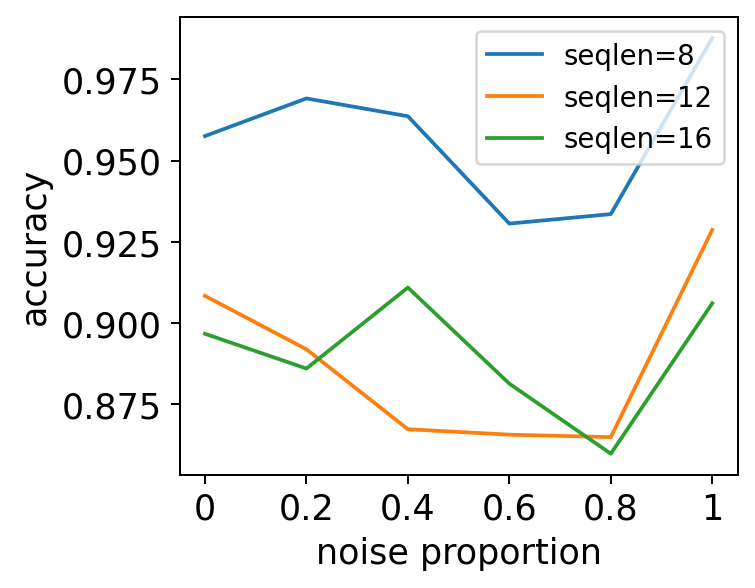

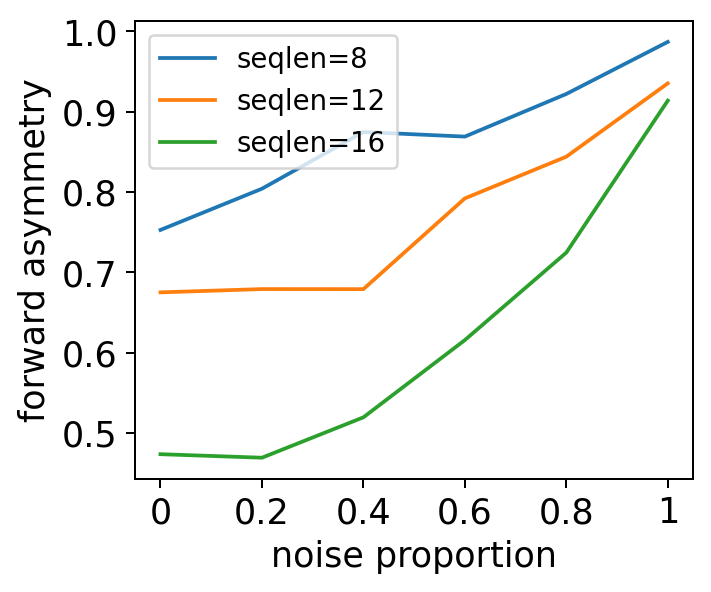

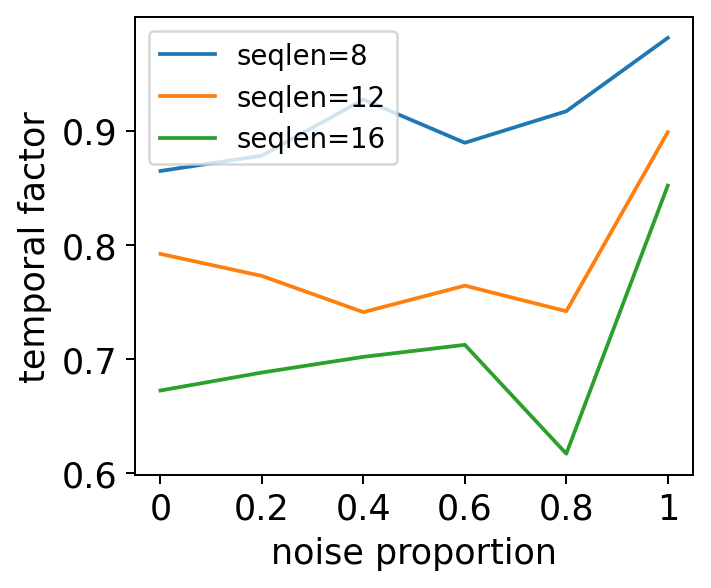

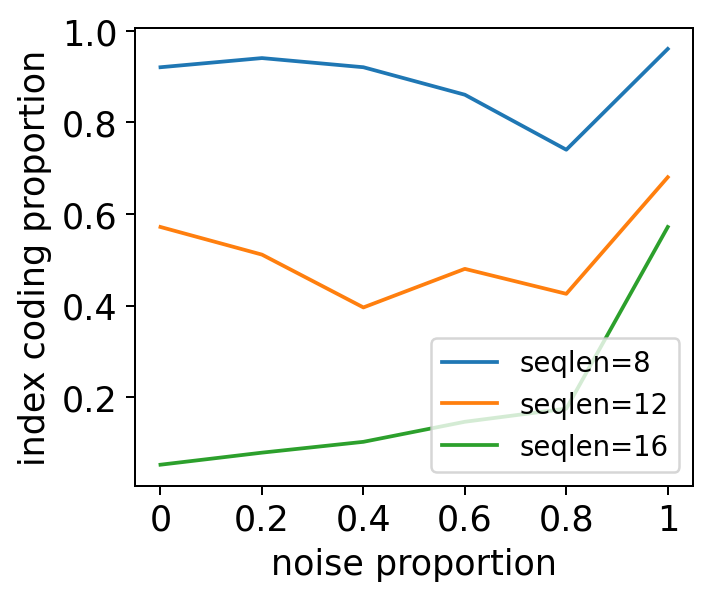

In [14]:
threshold = [0.8, 0.7, 0.6]
threshold = [0.8, 0.7, 0.6]
tf_high = np.array([0.75, 0.8333, 0.875]).reshape(-1, 1)
# tf_low = np.array([0.37, 0.41, 0.43]).reshape(-1, 1)
tf_low = np.zeros(3).reshape(-1, 1)

# all models with performance > 70

accuracy = np.zeros((3, 6))
forward_asymmetry = np.zeros((3, 6))
temporal_factor = np.zeros((3, 6))
index_coding_prop = np.zeros((3, 6))
cnt = np.zeros((3, 6))


for i, s in enumerate(seqlen):
    for j, n in enumerate(noise):
        exp_path = Path("./experiments/RL/Noise/NBack/figures/ValueMemoryGRU/setup_seq{}_noise{}".format(s, str(n).replace(".", "")))
        for k in range(50):
            if not os.path.exists(exp_path / str(k) / "contiguity_effect.csv"):
                continue
            with open(exp_path / str(k) / "contiguity_effect.csv") as f:
                reader = csv.reader(f)
                for row in reader:
                    if float(row[0]) >= 0.7:
                        cnt[i, j] += 1
                        accuracy[i, j] += float(row[0])
                        forward_asymmetry[i, j] += float(row[1])
                        temporal_factor[i, j] += float(row[2])
                        data = np.load(exp_path / str(k) / "pc_selectivity_recalling.npz", allow_pickle=True)
                        # index_coding_prop[i, j] += data['selectivity'][1][-1]
                        if data['selectivity'][1][-1] >= threshold[i]:
                            index_coding_prop[i, j] += 1.0
print(cnt)
cnt[cnt==0] = 1
accuracy /= cnt
forward_asymmetry /= cnt
temporal_factor /= cnt
temporal_factor = (temporal_factor - tf_low) / (tf_high - tf_low)
index_coding_prop /= cnt
print(index_coding_prop)

xticks = ["0", "0.2", "0.4", "0.6", "0.8", "1"]
xlabel = "noise proportion"
figpath = Path("./figures/strategy/gamma09")

plot_multiline(accuracy, "accuracy", figpath, xticks=xticks, xlabel=xlabel)
plot_multiline(forward_asymmetry, "forward asymmetry", figpath, xticks=xticks, xlabel=xlabel)
plot_multiline(temporal_factor, "temporal factor", figpath, xticks=xticks, xlabel=xlabel)
plot_multiline(index_coding_prop, "index coding proportion", figpath, xticks=xticks, xlabel=xlabel)


correlation of the factors

In [6]:
noise = [0, 0.2, 0.4, 0.6, 0.8, 1]
threshold = [0.8, 0.7, 0.6]
tf_high = 0.875 # 0.875 # 0.833 # 0.75
# tf_low = np.array([0.37, 0.41, 0.43]).reshape(-1, 1)
tf_low = 0.0

# all models with performance > 70

accuracy = []
forward_asymmetry = []
temporal_factor = []
index_coding_prop = []
noises = []
tdr_index_enc = []
tdr_index_rec = []

for i, n in enumerate(noise):
    exp_path = Path("./experiments/RL/Noise/NBack/figures/ValueMemoryGRU/setup_seq16_noise{}".format(str(n).replace(".", "")))
    tdr_path = Path("./experiments/RL/Noise/NBack/figures/tdr/ValueMemoryGRU/setup_seq16_noise{}".format(str(n).replace(".", "")))
    for k in range(100):
        if not os.path.exists(exp_path / str(k) / "contiguity_effect.csv"):
            # print(exp_path / str(k) / "contiguity_effect.csv")
            continue
        with open(exp_path / str(k) / "contiguity_effect.csv") as f:
            reader = csv.reader(f)
            for row in reader:
                if float(row[0]) >= 0.7:
                    noises.append(n)
                    accuracy.append(float(row[0]))
                    forward_asymmetry.append(float(row[1]))
                    temporal_factor.append(float(row[2]))
                    data = np.load(exp_path / str(k) / "pc_selectivity_recalling.npz", allow_pickle=True)
                    index_coding_prop.append(data['selectivity'][1][-1])
                    tdr_data = np.load(tdr_path / str(k) / "tdr_variance.npy", allow_pickle=True)
                    tdr_index_enc.append(tdr_data[0] / (tdr_data[0] + tdr_data[1]))
                    tdr_index_rec.append(tdr_data[2] / (tdr_data[2] + tdr_data[3]))
                    # accuracy[i].append(float(row[0]))
                    # forward_asymmetry[i].append(float(row[1]))
                    # temporal_factor[i].append(float(row[2]))
                    # data = np.load(exp_path / str(k) / "pc_selectivity_recalling.npz", allow_pickle=True)
                    # index_coding_prop[i].append(data['selectivity'][1][-1])

                    # accuracy[i, j] += float(row[0])
                    # forward_asymmetry[i, j] += float(row[1])
                    # temporal_factor[i, j] += float(row[2])
                    # data = np.load(exp_path / str(k) / "pc_selectivity_recalling.npz", allow_pickle=True)
                    # index_coding_prop[i, j] += data['selectivity'][1][-1]
                        # if data['selectivity'][1][-1] >= threshold[i]:
                        #     index_coding_prop[i, j] += 1.0

noises = np.array(noises)
accuracy = np.array(accuracy)
forward_asymmetry = np.array(forward_asymmetry)
temporal_factor = np.array(temporal_factor)
index_coding_prop = np.array(index_coding_prop)
tdr_index_enc = np.array(tdr_index_enc)
tdr_index_rec = np.array(tdr_index_rec)

temporal_factor = (temporal_factor - tf_low) / (tf_high - tf_low)



In [44]:
from sklearn.linear_model import LinearRegression
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D

colors = np.array([plt.cm.viridis(i) for i in np.linspace(0, 1, 6)])
cmap = ListedColormap(colors)
norm = plt.Normalize(vmin=-0.1, vmax=1.1)
markers = ['o', 'x']


def plot_groups(xdata, ydata, group, label, xlabel, ylabel, title=None, save_path=None, figsize=(4, 3.3)):
    plt.figure(figsize=figsize, dpi=180)

    for j in range(len(noise)):
        for i in range(len(label)):
            plt.scatter(xdata[np.logical_and(group==i, noises==noise[j])], ydata[np.logical_and(group==i, noises==noise[j])], 
                        s=30, marker=markers[i], color=colors[j], alpha=0.4, label='group {}'.format(label[i]+1))
            # group==i and noises==noise[j]

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='group 1', 
                              markerfacecolor='k', markeredgecolor='k', markersize=7),
                          Line2D([0], [0], marker='x', color='w', label='group 2', 
                                 markerfacecolor='k', markeredgecolor='k', markersize=7)]
    plt.legend(handles=legend_elements, fontsize=11)

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ticks=np.linspace(0.0, 1.0, 6), label="noise proportion", ax=ax)

    plt.tight_layout()

    if save_path is not None and title is not None:
        savefig(save_path, title, format='svg')

    plt.show()

    
def plot_scatter_fit_line(xdata, ydata, xlabel, ylabel, title=None, save_path=None, figsize=(4, 3.3)):
    plt.figure(figsize=figsize, dpi=180)

    for j in range(len(noise)):
        plt.scatter(xdata[noises == noise[j]], ydata[noises == noise[j]], s=15, color=colors[j], alpha=0.4)

    regressor = LinearRegression()
    regressor.fit(np.array(xdata).reshape(-1, 1), np.array(ydata).reshape(-1, 1))
    slope = regressor.coef_[0][0]
    intercept = regressor.intercept_[0]
    score = regressor.score(np.array(xdata).reshape(-1, 1), np.array(ydata).reshape(-1, 1))

    if slope*np.min(xdata)+intercept > np.min(ydata):
        fit_line_point1 = [np.min(xdata)*0.95, slope*np.min(xdata)*0.95+intercept]
    else:
        fit_line_point1 = [(np.min(ydata)*0.95-intercept)/slope, np.min(ydata)*0.95]
    if slope*np.max(xdata)+intercept < np.max(ydata):
        fit_line_point2 = [np.max(xdata)*1.05, slope*np.max(xdata)*1.05+intercept]
    else:
        fit_line_point2 = [(np.max(ydata)*1.05-intercept)/slope, np.max(ydata)*1.05]

    plt.plot([fit_line_point1[0], fit_line_point2[0]], [fit_line_point1[1], fit_line_point2[1]], color='k', linestyle='--')
    plt.text((np.max(xdata)+np.min(ydata))/2.5, 0.98, "$r^2$={:.2f}".format(score), fontsize=14)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ticks=np.linspace(0, 1, 6), label="noise proportion", ax=ax)

    plt.tight_layout()

    if save_path is not None and title is not None:
        savefig(save_path, title, format='svg')

    plt.show()

In [12]:
from sklearn.cluster import KMeans
from scipy import stats


feature = np.concatenate((forward_asymmetry.reshape(-1, 1), temporal_factor.reshape(-1, 1), index_coding_prop.reshape(-1, 1)), axis=1)
kmeans = KMeans(n_clusters=2)
kmeans.fit(feature)
label = kmeans.predict(feature)
print(label)

[0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1
 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0
 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1
 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]


/scratch/ml8736/ml/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [45]:

plot_groups(forward_asymmetry, temporal_factor, label, [0, 1], "forward asymmetry", "temporal factor", 
            save_path="./figures/strategy/relation", title="group_fa_tf", figsize=(4.2, 3.3))
plot_groups(forward_asymmetry, index_coding_prop, label, [0, 1], "forward asymmetry", "decoding accuracy\nof item index", 
            save_path="./figures/strategy/relation", title="group_fa_index", figsize=(4.5, 3.3))
# plot_groups(forward_asymmetry, accuracy, label, [0, 1], "forward asymmetry", "task performance", 
#             save_path="./figures/strategy/relation", title="group_fa_acc")
plot_scatter_fit_line(index_coding_prop, accuracy, "decoding accuracy\nof item index", "task performance", 
                      save_path="./figures/strategy/relation", title="fit_index_acc", figsize=(4.2, 3.5))
plot_scatter_fit_line(temporal_factor, accuracy, "temporal factor", "task performance", 
                      save_path="./figures/strategy/relation", title="fit_tf_acc", figsize=(4.2, 3.3))
# plot_scatter_fit_line(np.abs(forward_asymmetry-0.5), accuracy, "forward asymmetry", "task performance", save_path="./figures/strategy/relation", title="fit_fa_acc")


# perfs = np.zeros(2)
# perfs_std = np.zeros(2)
# perfs[0] = np.mean(accuracy[label==0])
# perfs[1] = np.mean(accuracy[label==1])
# perfs_std[0] = np.std(accuracy[label==0])
# perfs_std[1] = np.std(accuracy[label==1])

# plt.figure(figsize=(3, 3.3), dpi=180)
# # plt.bar([0, 1], perfs, yerr=perfs_std, width=0.5)
# plt.boxplot([accuracy[label==0], accuracy[label==1]], positions=[0, 1], widths=0.5)
# # plt.violinplot([accuracy[label==0], accuracy[label==1]], positions=[0, 1], widths=0.5)
# plt.xticks([0, 1], ["group 1", "group 2"])
# plt.ylabel("task performance")
# plt.ylim(0.6, 1.0)
# ax = plt.gca()
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# plt.tight_layout()
# # savefig("./figures/strategy/relation", "group_acc")
# plt.show()

# print(stats.ttest_ind(accuracy[label==0], accuracy[label==1]))


fa_label = np.zeros(len(noise))
fa_label_std = np.zeros(len(noise))
for i, n in enumerate(noise):
    # l = label[noises == n]
    fa = forward_asymmetry[noises == n]
    fa_label[i] = np.mean(fa)
    fa_label_std[i] = np.std(fa)

plt.figure(figsize=(4, 3.5), dpi=180)
plt.errorbar(noise, fa_label, yerr=fa_label_std, fmt='o-')
# plt.plot(noise, fa_label)
plt.xlabel("noise proportion")
plt.ylabel("forward asymmetry")
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
savefig("./figures/strategy/relation", "fa_noise", format='svg')
plt.show()


# tf_label = np.zeros(len(noise))
# tf_label_std = np.zeros(len(noise))
# for i, n in enumerate(noise):
#     # l = label[noises == n]
#     tf = temporal_factor[noises == n]
#     tf_label[i] = np.mean(tf)
#     tf_label_std[i] = np.std(tf)

# plt.figure(figsize=(4, 3.3), dpi=180)
# plt.errorbar(noise, tf_label, yerr=tf_label_std)
# # plt.plot(noise, tf_label)
# plt.xlabel("noise proportion")
# plt.ylabel("temporal factor")
# ax = plt.gca()
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# plt.tight_layout()
# plt.show()


noise_label = np.zeros(len(noise))
for i, n in enumerate(noise):
    l = label[noises == n]
    noise_label[i] = 1.0 - np.mean(l)
print(noise_label)

plt.figure(figsize=(4, 3.5), dpi=180)
plt.plot(noise, noise_label, color='gray')
plt.fill_between(noise, noise_label, 1.0, alpha=0.3, label="group 1")
plt.fill_between(noise, noise_label, 0.0, alpha=0.3, label="group 2")
# plt.legend()
plt.text(0.3, 0.2, "group 1", fontsize=12)
plt.text(0.3, 0.8, "group 2", fontsize=12)
plt.xlabel("noise proportion")
plt.ylabel("proportion of\nstrategy")
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([])
# ax.axes.get_yaxis().set_visible(False)
plt.tight_layout()
savefig("./figures/strategy/relation", "strategy_noise", format='svg')
plt.show()

[0.39473684 0.33333333 0.39534884 0.38297872 0.19148936 0.        ]


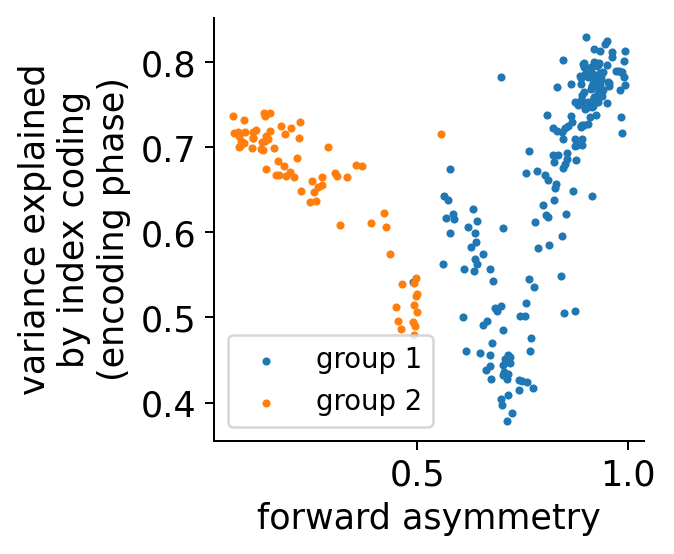

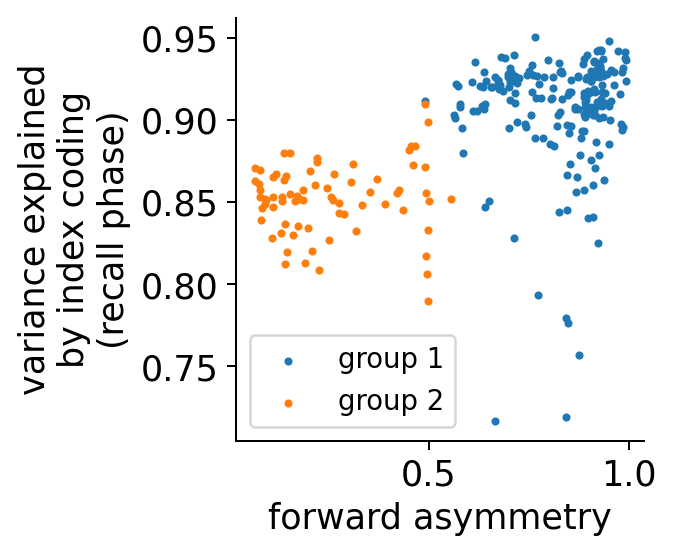

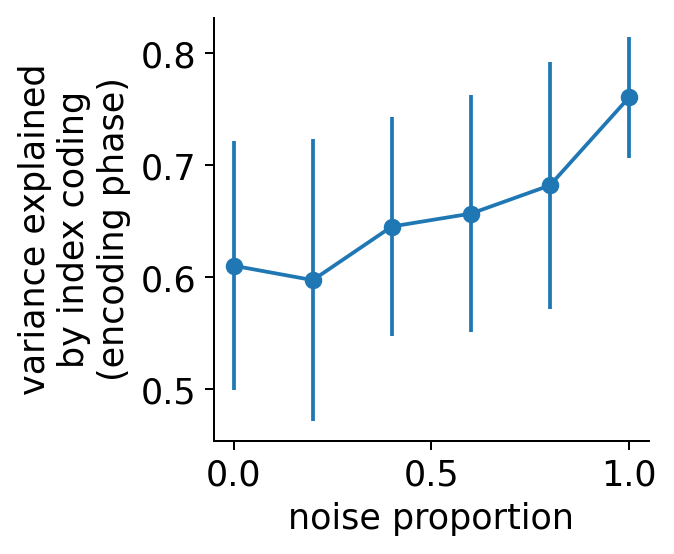

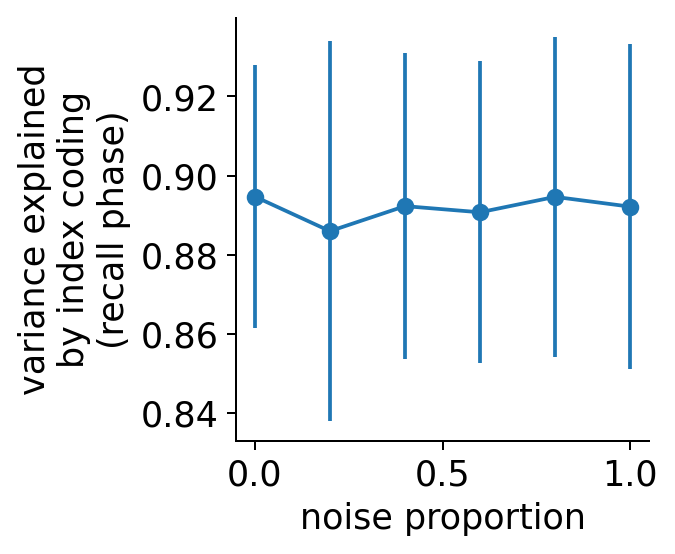

In [12]:
plot_groups(forward_asymmetry, tdr_index_enc, label, [0, 1], "forward asymmetry", "variance explained\nby index coding\n(encoding phase)", 
            save_path="./figures/strategy/relation", title="group_fa_tdrenc")
plot_groups(forward_asymmetry, tdr_index_rec, label, [0, 1], "forward asymmetry", "variance explained\nby index coding\n(recall phase)", 
            save_path="./figures/strategy/relation", title="group_fa_tdrrec")

tdrenc_label = np.zeros(len(noise))
tdrenc_label_std = np.zeros(len(noise))
for i, n in enumerate(noise):
    tdrenc = tdr_index_enc[noises == n]
    tdrenc_label[i] = np.mean(tdrenc)
    tdrenc_label_std[i] = np.std(tdrenc)

plt.figure(figsize=(4, 3.3), dpi=180)
plt.errorbar(noise, tdrenc_label, yerr=tdrenc_label_std, fmt='o-')
# plt.plot(noise, fa_label)
plt.xlabel("noise proportion")
plt.ylabel("variance explained\nby index coding\n(encoding phase)")
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

tdrrec_label = np.zeros(len(noise))
tdrrec_label_std = np.zeros(len(noise))
for i, n in enumerate(noise):
    tdrrec = tdr_index_rec[noises == n]
    tdrrec_label[i] = np.mean(tdrrec)
    tdrrec_label_std[i] = np.std(tdrrec)

plt.figure(figsize=(4, 3.3), dpi=180)
plt.errorbar(noise, tdrrec_label, yerr=tdrrec_label_std, fmt='o-')
plt.xlabel("noise proportion")
plt.ylabel("variance explained\nby index coding\n(recall phase)")
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()